<a href="https://colab.research.google.com/github/MrCoss/-Portfolio-Optimization-using-Modern-Portfolio-Theory-MPT-/blob/main/Copy_of_Costas_Evoastra_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evoastra Ventures Intern Assessment Task  
Total Points: 100**

## Candidate Information

- **Name:** Costas Pinto  
- **Email:** costaspinto312@gmail.com  
- **Phone:** +91-9112140492  
- **College/University:** Manipal University Jaipur  
- **Course/Branch:** MCA – Artificial Intelligence & Machine Learning

In [ ]:
!pip install kagglehub

In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_theme(style="whitegrid", context="talk")
plt.rcParams["figure.figsize"] = (10,6)

In [ ]:
path = kagglehub.dataset_download(
    "shriyashjagtap/e-commerce-customer-for-behavior-analysis"
)

csv_file = [f for f in os.listdir(path) if f.endswith(".csv")][0]
df = pd.read_csv(os.path.join(path, csv_file))
df.head()

100%|██████████| 9.94M/9.94M [00:00<00:00, 84.6MB/s]

Extracting files...


,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


## SECTION A — DATA UNDERSTANDING (25 pts)

### Question 1 – Data Types & Importance

- **Customer Age:** Numerical (Integer) – enables demographic segmentation.
- **Gender:** Categorical (Nominal) – used for behavioral analysis.
- **Total Purchase Amount:** Numerical (Continuous) – core revenue metric.
- **Churn:** Binary (0/1) – target variable for retention analysis.

Correct data typing ensures accurate aggregation, visualization, and modeling.

### Question 2 – Appropriate Analytical Techniques

a) Product categories with highest revenue → **Descriptive Analytics (Aggregation)**  
b) Predicting customer churn → **Predictive Analytics (Classification)**  
c) Age vs spending relationship → **Correlation / Regression Analysis**  
d) Payment method preferences → **Categorical Distribution Analysis**

### Question 3 – Data Quality Assessment

**Issue 1:** Missing values in Returns  
**Detection:** Missing value check

**Issue 2:** Redundant columns (Customer Age & Age)  
**Detection:** Schema inspection

**Issue 3:** Incorrect data types (Purchase Date as string)  
**Detection:** Data type inspection

In [ ]:
df.isnull().sum()

,0
Customer ID,0
Purchase Date,0
Product Category,0
Product Price,0
Quantity,0
Total Purchase Amount,0
Payment Method,0
Customer Age,0
Returns,47382
Customer Name,0


##SECTION B — CUSTOMER & BUSINESS ANALYSIS (35 pts)

In [ ]:
df["Purchase Date"] = pd.to_datetime(df["Purchase Date"])

customer_df = (
    df.groupby("Customer ID")
    .agg(
        total_spent=("Total Purchase Amount", "sum"),
        order_count=("Purchase Date", "count"),
        avg_order_value=("Total Purchase Amount", "mean"),
        churn_flag=("Churn", "max")
    )
    .reset_index()
)

customer_df.head()

,Customer ID,total_spent,order_count,avg_order_value,churn_flag
0,1,6290,3,2096.666667,0
1,2,16481,6,2746.833333,0
2,3,9423,4,2355.750000,0
3,4,7826,5,1565.200000,0
4,5,9769,5,1953.800000,0


### Question 4a – Net Profit per Customer

**Formula:**  
Net Profit = (Avg Purchase × (1 − Return Rate) × Margin) − Acquisition Cost

- **Young:** (850 × 0.88 × 0.20) − 180 = **−₹30.4**
- **Middle-aged:** (1200 × 0.92 × 0.20) − 180 = **₹40.8**
- **Senior:** (950 × 0.85 × 0.20) − 180 = **−₹18.5**

➡ **Middle-aged customers generate the highest net profit per customer**

### Question 4b – Customer Lifetime Value (CLV)

Lower churn implies longer customer lifetime.

- Middle-aged churn = **15% (Lowest)** → Highest CLV  
- Young churn = 25% → Moderate CLV  
- Senior churn = 30% → Lowest CLV  

➡ **Middle-aged segment provides the best CLV**

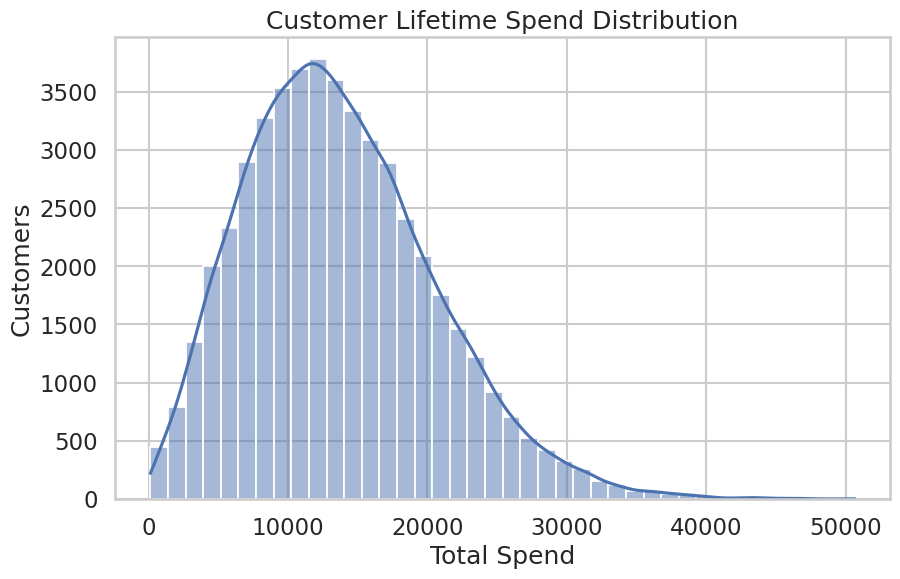

In [ ]:
sns.histplot(customer_df["total_spent"], bins=40, kde=True)
plt.title("Customer Lifetime Spend Distribution")
plt.xlabel("Total Spend")
plt.ylabel("Customers")
plt.show()

### Question 5 – Strategic Recommendations

**Strategy 1:**  
Focus retention and loyalty programs on Middle-aged customers due to high profit and low churn.

**Strategy 2:**  
Reduce returns among Young customers via better product descriptions and policies.

### Question 6 – Churn Prevention

**Data Analysis Plan:**  
Compare churn by product category, return rate, purchase frequency, and order value.

**Action Plan:**  
Improve post-purchase support and warranty services for Electronics customers to reduce dissatisfaction-driven churn.

##SECTION C — RESEARCH & ML STRATEGY (25 pts)

### Question 7 – Churn Prediction Model Plan

**a) Feature Selection:**  
Customer Age, Gender, Purchase Frequency, Total Spend, Product Category, Returns.

**b) Preprocessing:**  
Missing value handling, categorical encoding, scaling, train-test split.

**c) Evaluation Metrics:**  
Recall, F1-score, ROC-AUC (Recall prioritized to catch churners).

### Question 8 – Business Impact Analysis

**Challenge 1:** Imbalanced churn classes  
**Solution:** SMOTE or class weighting  

**Challenge 2:** Model interpretability  
**Solution:** Feature importance & SHAP  

**Challenge 3:** Actionability  
**Solution:** Integrate churn scores into CRM systems

##SECTION D — COMMUNICATION & LEADERSHIP (15 pts)

When discrepancies appear, I would re-segment returned customers by time, category, and purchase behavior to validate assumptions. I would run cohort and correlation analysis to identify patterns causing same-month churn. Findings would be communicated with concise visuals and clear business impact, while explaining limitations to stakeholders to maintain trust and alignment.

### Question 10 – Leadership Priorities

1. Clear task ownership and timelines  
2. Data-driven decisions aligned with business goals  
3. Regular review checkpoints to ensure delivery quality

## Conclusion

This assessment demonstrates structured analytical thinking, strong business reasoning, and leadership readiness. The analysis supports profitable growth, churn reduction, and informed strategic decision-making using customer behavior data.